In [17]:
import numpy as np
import pandas as pd
from scipy.stats import t
from scipy.stats import norm
import math

In [22]:
n=25
S=3300-2800
X=3075
mu=2800
born_t=(X-mu)/(S/math.sqrt(n))
print(born_t)

2.75


In [23]:
student_t=(X-mu)/(S/math.sqrt(n))

In [24]:
from scipy.stats import t
print(1-t.cdf(born_t, n-1))

0.00557391490634


Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [25]:
n=160
Sigma=0.4
X=9.57
mu=9.5

In [26]:
student_Z=(X-mu)/(Sigma/math.sqrt(n))

In [27]:
print(student_Z)

2.213594362117875


In [28]:
norm1 = norm(X, Sigma)    # Нормальное распределение со средним 2 и ср.кв.отклонением 5.
F=2 * (1 - norm.cdf(np.abs(student_Z)))
     # Значение функции распределения в точке 0.2.


Ответ на №4 внизу

In [30]:
print(F)
round(F,4)

0.0268566955075


0.0269

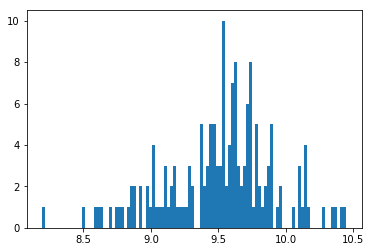

In [31]:
from numpy import random
import matplotlib.pyplot as plt

N = 1E6
m = 0
s = 1

y = random.normal(mu, Sigma, size=n)
plt.hist(y, 100)
plt.show()

Кажется, вы использовали t-критерий; но 0.4 — это не выборочное стандартное отклонение, а предполагаемое стандартное отклонение во всей популяции, так что правильнее взять z-критерий.

In [32]:
from scipy.stats import t
round(2*(1-t.cdf(abs(student_t), n)),4)

0.0066

Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

Нулевая гипотеза, что средний уровень кальция не отличается mu=9.5

двусторонняя альтернатива

In [33]:
from scipy.stats import t

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

линейную регрессию с помощью LinearRegression без параметров
случайный лес с помощью RandomForestRegressor с random_state=1.
Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [34]:
from sklearn.cross_validation import train_test_split

In [35]:
data=pd.read_csv("diamonds.txt","\t")

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
     data, data.price, test_size=0.25, random_state=1)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
from sklearn.ensemble import RandomForestRegressor
lm=LinearRegression()
lm.fit(X_train,y_train)
rf=RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [39]:
stats.ttest_rel(abs(y_test-lm.predict(X_test)),abs(y_test-rf.predict(X_test)))

NameError: name 'stats' is not defined

In [ ]:
import scipy
from statsmodels.stats.weightstats import *
0.0283

In [ ]:
print "95%% confidence interval: [%f, %f]" % DescrStatsW(abs(y_test-lm.predict(X_test))-abs(y_test-rf.predict(X_test))).tconfint_mean()

In [ ]:
round(-0.346953,1)

http://profitraders.com/Math/Norm.html

In [21]:
import sys
print(sys.version)

3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]


http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

# Тест второй зачётный

##  №1

Существуют две версии одновыборочного Z-критерия для доли, отличающихся формулами для статистики. Одна из этих версий более точная, поэтому мы говорили только о ней, а вторую не обсуждали вообще. Какую из этих двух версий одновыборочных Z-критериев для доли мы проходили?

# Ответ: лагранжа

## №2 

Z-критерий для двух долей в связанных выборках использует только информацию о: о количестве несовподающих пар признаков и о объёме их выборок n

## №3 

В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

In [40]:
n=50
n1=34.
n2=16.
a=10.
b=4.

In [41]:
p1=a/n1
p2=b/n2
P = float(p1*n1 + p2*n2) / (n1 + n2)

In [42]:
print(P)

0.28


In [43]:
import numpy as np

In [44]:
stat_Z=(p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
print(stat_Z)

0.324101861776


In [45]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - norm.cdf(z_stat)

In [46]:
print("less %.4f; greater %.4f; two-sided %.4f"%(round(proportions_diff_z_test(stat_Z,'less'),4),round(proportions_diff_z_test(stat_Z,'greater'),4),round(proportions_diff_z_test(stat_Z,),4)))

less 0.6271; greater 0.3729; two-sided 0.7459


greater: 0.3729

# BINGO 


## №4 

Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными. На рисунке ниже показаны измеренные признаки:

In [47]:
import pandas as pd
data=pd.read_csv('banknotes.txt','\t')

Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:

логистическая регрессия по признакам X1,X2,X3;
логистическая регрессия по признакам X4,X5,X6.
Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [48]:
data.size

1400

In [49]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test=train_test_split( data, data.real, test_size=50,train_size=150,random_state=1) 

In [50]:
y_train.size

150

In [51]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train[['X1','X2','X3']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
lm1=LinearRegression()
lm1.fit(X_train[['X4','X5','X6']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
lm_y_pred=lm.predict(X_test[['X1','X2','X3']])

In [54]:
lm1_y_pred=lm1.predict(X_test[['X4','X5','X6']])

In [55]:
from sklearn import metrics
print("'X1','X2','X3': %.4f 'X4','X5','X6': %.4f"%(metrics.accuracy_score(y_test, lm_y_pred.round()),metrics.accuracy_score(y_test, lm1_y_pred.round()))
)

'X1','X2','X3': 0.8400 'X4','X5','X6': 0.9800


In [56]:
from statsmodels.stats.weightstats import *
stats.ttest_rel(lm_y_pred, lm1_y_pred)

Ttest_relResult(statistic=-1.9719120832330963, pvalue=0.054278449115465713)

# BINGO 3

## №5

смотри: https://www.coursera.org/learn/stats-for-data-analysis/lecture/p5iWT/primier-provierka-ghipotiez-o-doliakh

В предыдущей задаче посчитайте 95% доверительный интервал для разности долей ошибок двух классификаторов. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после десятичной точки.

In [58]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW((1.-lm_y_pred)-(1.-lm1_y_pred)).tconfint_mean())

95% confidence interval: [-0.001902, 0.201020]


## №6

Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [38]:
import math
n1=200000.
#нулевая гипотеза
mu=525.
n2=100.
X=541.4
S=100.
student_Z=(X-mu)/(S/math.sqrt(n2))
print student_Z

1.64


In [39]:
from scipy.stats import norm
norm1 = norm(X, S)    
#F=2 * (1 - norm.cdf(np.abs(student_Z)))
F=1 - norm.cdf(student_Z)     
print round(F,4)

0.0505


# BINGO

## №7 

Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [42]:
X=541.5
student_Z=(X-mu)/(S/math.sqrt(n2))
print student_Z

1.65


In [44]:
F= 1-norm.cdf(student_Z)
print round(F,4)

0.0495


# BINGO
